In [1]:
import tensorflow as tf
import os
import random
import numpy as np

In [2]:
from tqdm import tqdm 

In [3]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage import io, color
import matplotlib.pyplot as plt
import imageio.v3 as iio
from skimage import io, util
import skimage.color
import skimage.filters
import glob

In [4]:
seed = 42
np.random.seed = seed

In [5]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [6]:
TRAIN_PATH = 'images/train_images/train/'
# TRAIN_PATH = 'images/train_images/'
TRAIN_MASK = 'images/train_images/mask'
TEST_PATH = 'images/test/'

In [7]:
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]
print(len(train_ids))

0


In [8]:
num = len([f for f in os.listdir(TRAIN_PATH) if os.path.isfile(os.path.join(TRAIN_PATH, f))])

print("Number of images in directory:", num)

Number of images in directory: 951


In [9]:
X_train = np.zeros((num, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# Y_train = np.zeros((num, IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
Y_train = np.zeros((num, IMG_HEIGHT, IMG_WIDTH), dtype=bool)
Y_train.shape

(951, 128, 128)

In [10]:
print('Resizing training images and masks')
num = len([f for f in os.listdir(TRAIN_PATH) if os.path.isfile(os.path.join(TRAIN_PATH, f))])

for n, filename in zip(range(num), os.listdir(TRAIN_PATH)):
    # Check if the file is an image
    path = TRAIN_PATH
    print(path+'/'+filename)
    img = imread(path+'/'+filename)[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    print(n)
    X_train[n] = img
    

Resizing training images and masks
images/train_images/train//frame_14859_endo.png
0
images/train_images/train//frame_14860_endo.png
1
images/train_images/train//frame_14862_endo.png
2
images/train_images/train//frame_14863_endo.png
3
images/train_images/train//frame_14867_endo.png
4
images/train_images/train//frame_14868_endo.png
5
images/train_images/train//frame_14869_endo.png
6
images/train_images/train//frame_14870_endo.png
7
images/train_images/train//frame_14871_endo.png
8
images/train_images/train//frame_14872_endo.png
9
images/train_images/train//frame_14873_endo.png
10
images/train_images/train//frame_14874_endo.png
11
images/train_images/train//frame_14875_endo.png
12
images/train_images/train//frame_14876_endo.png
13
images/train_images/train//frame_14878_endo.png
14
images/train_images/train//frame_14879_endo.png
15
images/train_images/train//frame_14880_endo.png
16
images/train_images/train//frame_14882_endo.png
17
images/train_images/train//frame_14884_endo.png
18
images

162
images/train_images/train//frame_15069_endo.png
163
images/train_images/train//frame_15070_endo.png
164
images/train_images/train//frame_15071_endo.png
165
images/train_images/train//frame_15072_endo.png
166
images/train_images/train//frame_15073_endo.png
167
images/train_images/train//frame_15074_endo.png
168
images/train_images/train//frame_15076_endo.png
169
images/train_images/train//frame_15077_endo.png
170
images/train_images/train//frame_15079_endo.png
171
images/train_images/train//frame_15080_endo.png
172
images/train_images/train//frame_15081_endo.png
173
images/train_images/train//frame_15082_endo.png
174
images/train_images/train//frame_15083_endo.png
175
images/train_images/train//frame_15084_endo.png
176
images/train_images/train//frame_15085_endo.png
177
images/train_images/train//frame_15086_endo.png
178
images/train_images/train//frame_15087_endo.png
179
images/train_images/train//frame_15088_endo.png
180
images/train_images/train//frame_15089_endo.png
181
images/t

322
images/train_images/train//frame_16434_endo.png
323
images/train_images/train//frame_16435_endo.png
324
images/train_images/train//frame_16436_endo.png
325
images/train_images/train//frame_16437_endo.png
326
images/train_images/train//frame_16438_endo.png
327
images/train_images/train//frame_16439_endo.png
328
images/train_images/train//frame_16440_endo.png
329
images/train_images/train//frame_16441_endo.png
330
images/train_images/train//frame_16442_endo.png
331
images/train_images/train//frame_16443_endo.png
332
images/train_images/train//frame_16445_endo.png
333
images/train_images/train//frame_16446_endo.png
334
images/train_images/train//frame_16449_endo.png
335
images/train_images/train//frame_16450_endo.png
336
images/train_images/train//frame_16451_endo.png
337
images/train_images/train//frame_16452_endo.png
338
images/train_images/train//frame_16453_endo.png
339
images/train_images/train//frame_16455_endo.png
340
images/train_images/train//frame_16456_endo.png
341
images/t

485
images/train_images/train//frame_211_endo.png
486
images/train_images/train//frame_214_endo.png
487
images/train_images/train//frame_215_endo.png
488
images/train_images/train//frame_216_endo.png
489
images/train_images/train//frame_217_endo.png
490
images/train_images/train//frame_219_endo.png
491
images/train_images/train//frame_221_endo.png
492
images/train_images/train//frame_222_endo.png
493
images/train_images/train//frame_223_endo.png
494
images/train_images/train//frame_224_endo.png
495
images/train_images/train//frame_225_endo.png
496
images/train_images/train//frame_226_endo.png
497
images/train_images/train//frame_227_endo.png
498
images/train_images/train//frame_228_endo.png
499
images/train_images/train//frame_233_endo.png
500
images/train_images/train//frame_234_endo.png
501
images/train_images/train//frame_236_endo.png
502
images/train_images/train//frame_237_endo.png
503
images/train_images/train//frame_239_endo.png
504
images/train_images/train//frame_240_endo.png


646
images/train_images/train//frame_28705_endo.png
647
images/train_images/train//frame_28706_endo.png
648
images/train_images/train//frame_28707_endo.png
649
images/train_images/train//frame_28708_endo.png
650
images/train_images/train//frame_28709_endo.png
651
images/train_images/train//frame_28710_endo.png
652
images/train_images/train//frame_28711_endo.png
653
images/train_images/train//frame_28712_endo.png
654
images/train_images/train//frame_28713_endo.png
655
images/train_images/train//frame_28714_endo.png
656
images/train_images/train//frame_28715_endo.png
657
images/train_images/train//frame_28716_endo.png
658
images/train_images/train//frame_28717_endo.png
659
images/train_images/train//frame_28718_endo.png
660
images/train_images/train//frame_28720_endo.png
661
images/train_images/train//frame_28723_endo.png
662
images/train_images/train//frame_28724_endo.png
663
images/train_images/train//frame_28725_endo.png
664
images/train_images/train//frame_28726_endo.png
665
images/t

805
images/train_images/train//frame_28912_endo.png
806
images/train_images/train//frame_28913_endo.png
807
images/train_images/train//frame_28915_endo.png
808
images/train_images/train//frame_28916_endo.png
809
images/train_images/train//frame_28918_endo.png
810
images/train_images/train//frame_28919_endo.png
811
images/train_images/train//frame_28920_endo.png
812
images/train_images/train//frame_28923_endo.png
813
images/train_images/train//frame_28924_endo.png
814
images/train_images/train//frame_28925_endo.png
815
images/train_images/train//frame_28926_endo.png
816
images/train_images/train//frame_28928_endo.png
817
images/train_images/train//frame_28929_endo.png
818
images/train_images/train//frame_28931_endo.png
819
images/train_images/train//frame_28932_endo.png
820
images/train_images/train//frame_28933_endo.png
821
images/train_images/train//frame_28934_endo.png
822
images/train_images/train//frame_28935_endo.png
823
images/train_images/train//frame_28936_endo.png
824
images/t

In [11]:
for n, filename in zip(range(num), os.listdir(TRAIN_MASK)):
    # Check if the file is an image
    path = TRAIN_MASK
    print(path+'/'+filename)
    mask_ = imread(path+'/'+filename)[:,:,:IMG_CHANNELS]
    gray_image = skimage.color.rgb2gray(mask_)
#     fig, ax = plt.subplots()
#     plt.imshow(gray_image, cmap="gray")
#     mask = color.rgb2gray(mask)
    t = 0.1
    binary_mask = gray_image < t
    inverted_image = util.invert(binary_mask)
    mask = resize(inverted_image, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    print(n)
    print(mask.shape)
    Y_train[n] = mask  #Fill empty Y_train with values from img


images/train_images/mask/frame_14859_endo.png
0
(128, 128)
images/train_images/mask/frame_14860_endo.png
1
(128, 128)
images/train_images/mask/frame_14862_endo.png
2
(128, 128)
images/train_images/mask/frame_14863_endo.png
3
(128, 128)
images/train_images/mask/frame_14867_endo.png
4
(128, 128)
images/train_images/mask/frame_14868_endo.png
5
(128, 128)
images/train_images/mask/frame_14869_endo.png
6
(128, 128)
images/train_images/mask/frame_14870_endo.png
7
(128, 128)
images/train_images/mask/frame_14871_endo.png
8
(128, 128)
images/train_images/mask/frame_14872_endo.png
9
(128, 128)
images/train_images/mask/frame_14873_endo.png
10
(128, 128)
images/train_images/mask/frame_14874_endo.png
11
(128, 128)
images/train_images/mask/frame_14875_endo.png
12
(128, 128)
images/train_images/mask/frame_14876_endo.png
13
(128, 128)
images/train_images/mask/frame_14878_endo.png
14
(128, 128)
images/train_images/mask/frame_14879_endo.png
15
(128, 128)
images/train_images/mask/frame_14880_endo.png
16
(

138
(128, 128)
images/train_images/mask/frame_15038_endo.png
139
(128, 128)
images/train_images/mask/frame_15039_endo.png
140
(128, 128)
images/train_images/mask/frame_15040_endo.png
141
(128, 128)
images/train_images/mask/frame_15041_endo.png
142
(128, 128)
images/train_images/mask/frame_15042_endo.png
143
(128, 128)
images/train_images/mask/frame_15043_endo.png
144
(128, 128)
images/train_images/mask/frame_15047_endo.png
145
(128, 128)
images/train_images/mask/frame_15048_endo.png
146
(128, 128)
images/train_images/mask/frame_15049_endo.png
147
(128, 128)
images/train_images/mask/frame_15050_endo.png
148
(128, 128)
images/train_images/mask/frame_15051_endo.png
149
(128, 128)
images/train_images/mask/frame_15052_endo.png
150
(128, 128)
images/train_images/mask/frame_15053_endo.png
151
(128, 128)
images/train_images/mask/frame_15055_endo.png
152
(128, 128)
images/train_images/mask/frame_15056_endo.png
153
(128, 128)
images/train_images/mask/frame_15057_endo.png
154
(128, 128)
images/tr

273
(128, 128)
images/train_images/mask/frame_16374_endo.png
274
(128, 128)
images/train_images/mask/frame_16375_endo.png
275
(128, 128)
images/train_images/mask/frame_16376_endo.png
276
(128, 128)
images/train_images/mask/frame_16377_endo.png
277
(128, 128)
images/train_images/mask/frame_16378_endo.png
278
(128, 128)
images/train_images/mask/frame_16379_endo.png
279
(128, 128)
images/train_images/mask/frame_16380_endo.png
280
(128, 128)
images/train_images/mask/frame_16381_endo.png
281
(128, 128)
images/train_images/mask/frame_16382_endo.png
282
(128, 128)
images/train_images/mask/frame_16383_endo.png
283
(128, 128)
images/train_images/mask/frame_16384_endo.png
284
(128, 128)
images/train_images/mask/frame_16385_endo.png
285
(128, 128)
images/train_images/mask/frame_16386_endo.png
286
(128, 128)
images/train_images/mask/frame_16387_endo.png
287
(128, 128)
images/train_images/mask/frame_16390_endo.png
288
(128, 128)
images/train_images/mask/frame_16392_endo.png
289
(128, 128)
images/tr

420
(128, 128)
images/train_images/mask/frame_16633_endo.png
421
(128, 128)
images/train_images/mask/frame_16635_endo.png
422
(128, 128)
images/train_images/mask/frame_16636_endo.png
423
(128, 128)
images/train_images/mask/frame_16637_endo.png
424
(128, 128)
images/train_images/mask/frame_16638_endo.png
425
(128, 128)
images/train_images/mask/frame_16639_endo.png
426
(128, 128)
images/train_images/mask/frame_16640_endo.png
427
(128, 128)
images/train_images/mask/frame_16642_endo.png
428
(128, 128)
images/train_images/mask/frame_16643_endo.png
429
(128, 128)
images/train_images/mask/frame_16644_endo.png
430
(128, 128)
images/train_images/mask/frame_16646_endo.png
431
(128, 128)
images/train_images/mask/frame_16647_endo.png
432
(128, 128)
images/train_images/mask/frame_16648_endo.png
433
(128, 128)
images/train_images/mask/frame_16649_endo.png
434
(128, 128)
images/train_images/mask/frame_16650_endo.png
435
(128, 128)
images/train_images/mask/frame_16651_endo.png
436
(128, 128)
images/tr

564
(128, 128)
images/train_images/mask/frame_28601_endo.png
565
(128, 128)
images/train_images/mask/frame_28603_endo.png
566
(128, 128)
images/train_images/mask/frame_28604_endo.png
567
(128, 128)
images/train_images/mask/frame_28605_endo.png
568
(128, 128)
images/train_images/mask/frame_28606_endo.png
569
(128, 128)
images/train_images/mask/frame_28607_endo.png
570
(128, 128)
images/train_images/mask/frame_28608_endo.png
571
(128, 128)
images/train_images/mask/frame_28609_endo.png
572
(128, 128)
images/train_images/mask/frame_28610_endo.png
573
(128, 128)
images/train_images/mask/frame_28611_endo.png
574
(128, 128)
images/train_images/mask/frame_28612_endo.png
575
(128, 128)
images/train_images/mask/frame_28613_endo.png
576
(128, 128)
images/train_images/mask/frame_28614_endo.png
577
(128, 128)
images/train_images/mask/frame_28615_endo.png
578
(128, 128)
images/train_images/mask/frame_28616_endo.png
579
(128, 128)
images/train_images/mask/frame_28618_endo.png
580
(128, 128)
images/tr

708
(128, 128)
images/train_images/mask/frame_28787_endo.png
709
(128, 128)
images/train_images/mask/frame_28789_endo.png
710
(128, 128)
images/train_images/mask/frame_28790_endo.png
711
(128, 128)
images/train_images/mask/frame_28792_endo.png
712
(128, 128)
images/train_images/mask/frame_28794_endo.png
713
(128, 128)
images/train_images/mask/frame_28795_endo.png
714
(128, 128)
images/train_images/mask/frame_28796_endo.png
715
(128, 128)
images/train_images/mask/frame_28798_endo.png
716
(128, 128)
images/train_images/mask/frame_287_endo.png
717
(128, 128)
images/train_images/mask/frame_28800_endo.png
718
(128, 128)
images/train_images/mask/frame_28801_endo.png
719
(128, 128)
images/train_images/mask/frame_28802_endo.png
720
(128, 128)
images/train_images/mask/frame_28803_endo.png
721
(128, 128)
images/train_images/mask/frame_28804_endo.png
722
(128, 128)
images/train_images/mask/frame_28805_endo.png
723
(128, 128)
images/train_images/mask/frame_28807_endo.png
724
(128, 128)
images/trai

854
(128, 128)
images/train_images/mask/frame_28972_endo.png
855
(128, 128)
images/train_images/mask/frame_28973_endo.png
856
(128, 128)
images/train_images/mask/frame_28974_endo.png
857
(128, 128)
images/train_images/mask/frame_28975_endo.png
858
(128, 128)
images/train_images/mask/frame_28977_endo.png
859
(128, 128)
images/train_images/mask/frame_28978_endo.png
860
(128, 128)
images/train_images/mask/frame_28979_endo.png
861
(128, 128)
images/train_images/mask/frame_289_endo.png
862
(128, 128)
images/train_images/mask/frame_291_endo.png
863
(128, 128)
images/train_images/mask/frame_292_endo.png
864
(128, 128)
images/train_images/mask/frame_293_endo.png
865
(128, 128)
images/train_images/mask/frame_294_endo.png
866
(128, 128)
images/train_images/mask/frame_295_endo.png
867
(128, 128)
images/train_images/mask/frame_296_endo.png
868
(128, 128)
images/train_images/mask/frame_297_endo.png
869
(128, 128)
images/train_images/mask/frame_298_endo.png
870
(128, 128)
images/train_images/mask/fr

In [12]:
print(Y_train.shape)

(951, 128, 128)


In [9]:
# test images
X_test = np.zeros((num, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []

In [10]:
print('Resizing test images') 
for n, id_ in zip(range(num), os.listdir(TEST_PATH)):
    path = TEST_PATH + id_
    print(path)
    img = imread(path)[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

Resizing test images
images/test/frame_14861_endo.png
images/test/frame_14864_endo.png
images/test/frame_14865_endo.png
images/test/frame_14866_endo.png
images/test/frame_14877_endo.png
images/test/frame_14881_endo.png
images/test/frame_14883_endo.png
images/test/frame_14885_endo.png
images/test/frame_14886_endo.png
images/test/frame_14893_endo.png
images/test/frame_14894_endo.png
images/test/frame_14922_endo.png
images/test/frame_14923_endo.png
images/test/frame_14925_endo.png
images/test/frame_14927_endo.png
images/test/frame_14930_endo.png
images/test/frame_14938_endo.png
images/test/frame_14941_endo.png
images/test/frame_14949_endo.png
images/test/frame_14950_endo.png
images/test/frame_14956_endo.png
images/test/frame_14970_endo.png
images/test/frame_14977_endo.png
images/test/frame_14983_endo.png
images/test/frame_14985_endo.png
images/test/frame_14986_endo.png
images/test/frame_14989_endo.png
images/test/frame_14993_endo.png
images/test/frame_15001_endo.png
images/test/frame_1500

In [16]:
# from skimage import io, color
# path = TRAIN_MASK
# mask = imread(path+'/'+'frame_14860_endo.png')[:,:,:IMG_CHANNELS]
# mask_ = color.rgb2binary(mask)
# mask__ = resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
# shape = mask_.shape
# chan = shape[0]
# print(mask_[2])
# imshow(mask__)
# plt.show()

930


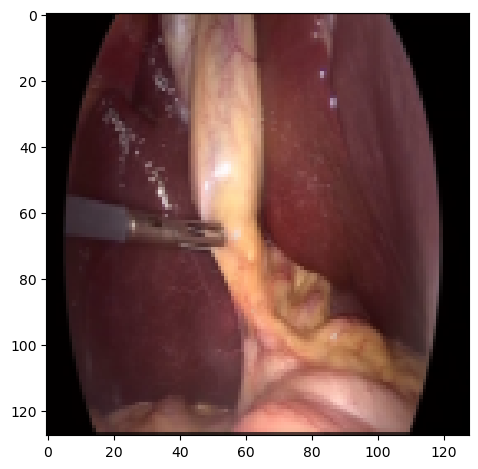

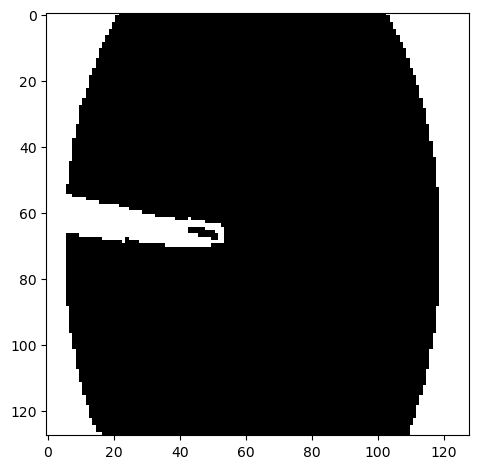

In [15]:
image_x = random.randint(0, num)
print(image_x)
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

In [16]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

In [17]:
#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)


In [18]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

 conv2d_15 (Conv2D)             (None, 64, 64, 32)   9248        ['dropout_7[0][0]']              
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 128, 128, 16  2064       ['conv2d_15[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatenate_3 (Concatenate)    (None, 128, 128, 32  0           ['conv2d_transpose_3[0][0]',     
                                )                                 'conv2d_1[0][0]']               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 128, 128, 16  4624        ['concatenate_3[0][0]']          
                                )                                                                 
          

In [24]:
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_instrument_seg.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
54/54 [==============================] - 165s 3s/step - loss: 0.3269 - accuracy: 0.8450 - val_loss: 0.1718 - val_accuracy: 0.9471
Epoch 2/25
54/54 [==============================] - 150s 3s/step - loss: 0.0992 - accuracy: 0.9633 - val_loss: 0.1650 - val_accuracy: 0.9524
Epoch 3/25
54/54 [==============================] - 128s 2s/step - loss: 0.0600 - accuracy: 0.9767 - val_loss: 0.1297 - val_accuracy: 0.9700
Epoch 4/25
54/54 [==============================] - 128s 2s/step - loss: 0.0451 - accuracy: 0.9816 - val_loss: 0.1285 - val_accuracy: 0.9734
Epoch 5/25
54/54 [==============================] - 127s 2s/step - loss: 0.0406 - accuracy: 0.9831 - val_loss: 0.1270 - val_accuracy: 0.9771
Epoch 6/25
54/54 [==============================] - 127s 2s/step - loss: 0.0351 - accuracy: 0.9851 - val_loss: 0.1321 - val_accuracy: 0.9768
Epoch 7/25
54/54 [==============================] - 125s 2s/step - loss: 0.0324 - accuracy: 0.9863 - val_loss: 0.1365 - val_accuracy: 0.9751


In [25]:
model.save("Semantic_instrument_seg.h5")

In [30]:
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


30/30 [==============================] - 20s 673ms/step


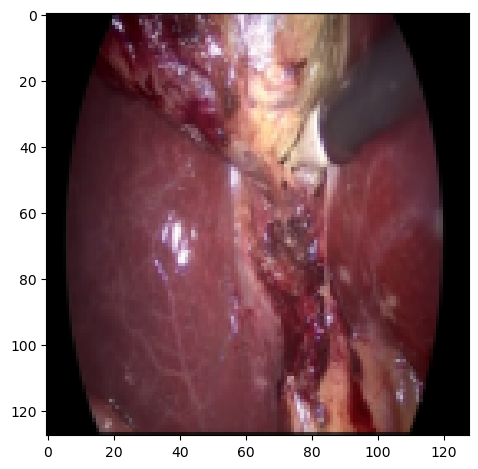

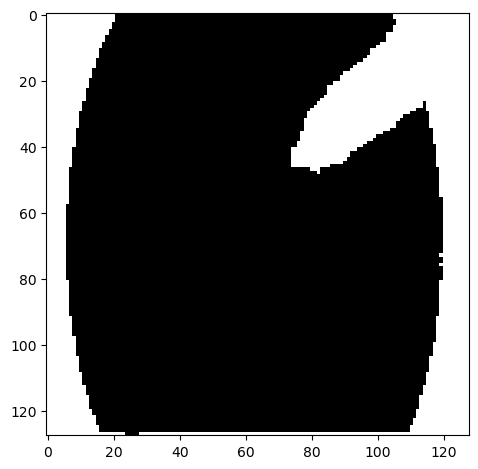

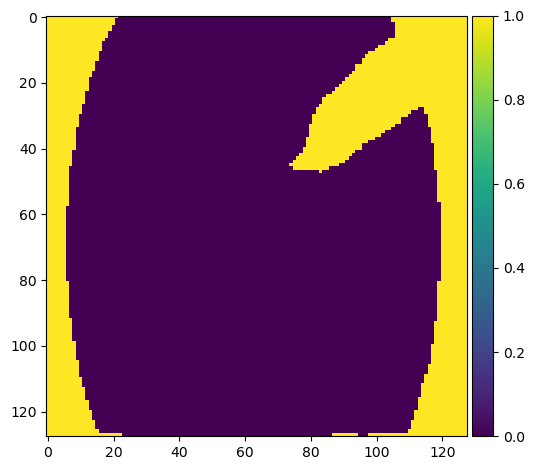

In [46]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

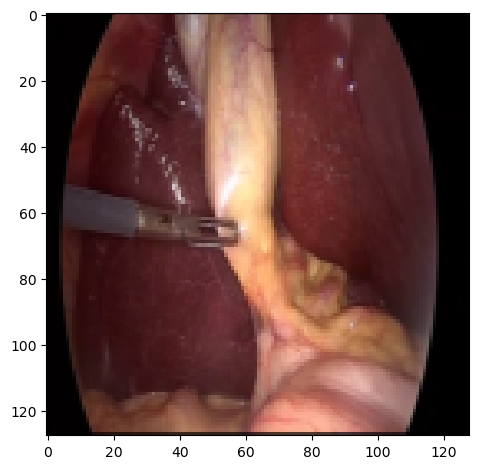

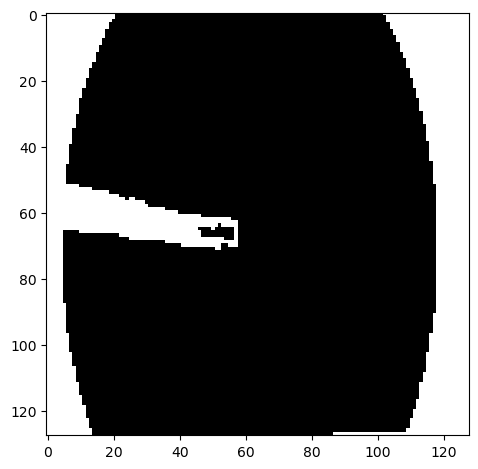

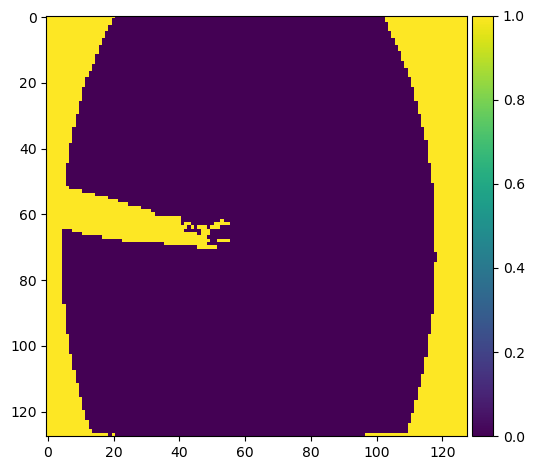

In [42]:
# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()

In [11]:
model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()

In [12]:
from tensorflow.keras.models import load_model
loaded_model = load_model("Semantic_instrument_seg.h5")
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

 conv2d_15 (Conv2D)             (None, 64, 64, 32)   9248        ['dropout_7[0][0]']              
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 128, 128, 16  2064       ['conv2d_15[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatenate_3 (Concatenate)    (None, 128, 128, 32  0           ['conv2d_transpose_3[0][0]',     
                                )                                 'conv2d_1[0][0]']               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 128, 128, 16  4624        ['concatenate_3[0][0]']          
                                )                                                                 
          

In [13]:
Z = loaded_model.predict(X_test)

30/30 [==============================] - 18s 586ms/step


In [21]:
abc = Z[25]

In [20]:
l = len(abc)
l

128

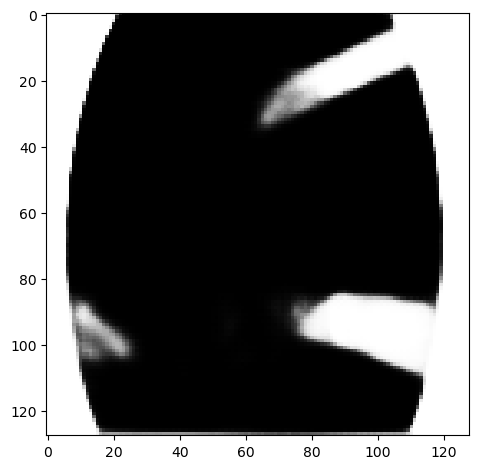

In [22]:
imshow(abc)